In [ ]:
%pip install folium matplotlib mapclassify contextily geopandas seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Bias Project"

/content/drive/MyDrive/Bias Project


In [ ]:
import geopandas as gpd
import pandas as pd

In [ ]:
#@title
attributes_series = {'P1_003N':'White',
                     'P1_004N':'Black',
                     'P1_006N':'Asians',
                    'P1_008N': 'Other Races',
                   'P1_009N':'Mixed Races'}

In [ ]:
test_results_merge_10mil = pd.read_csv('./Results/bus_results_2.csv', sep=',', header=0, index_col=0)['IL_dataset_10mil.csv']
test_results_merge_10mil

P1_003N    167.853357
P1_004N    177.084389
P1_006N    142.903759
P1_008N    176.632524
P1_009N    173.966587
Name: IL_dataset_10mil.csv, dtype: float64

In [ ]:
test_results_merge_10mil.rename(index=attributes_series)

White          167.853357
Black          177.084389
Asians         142.903759
Other Races    176.632524
Mixed Races    173.966587
Name: IL_dataset_10mil.csv, dtype: float64

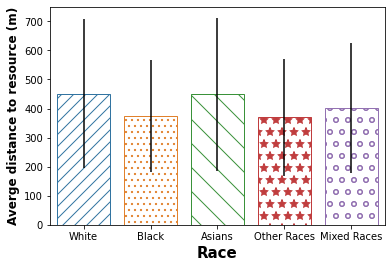

In [ ]:
import numpy as np

In [ ]:
test_results_merge_10mil['mean']

White          450.815217
Black          374.327359
Asians         449.498953
Other Races    370.043586
Mixed Races    401.158876
Name: mean, dtype: float64

In [ ]:
sample_size = pd.Series({'P1_003N':    985033,
'P1_004N':    800834,
'P1_008N':    470503,
'P1_009N':    296283,
'P1_006N':    192468})

In [ ]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
def run_graph(result_csv, path_result_plot):
    
    test_results_merge_10mil = pd.read_csv(result_csv, sep=',', header=1, index_col = 0).drop('race', axis=0)
    test_results_merge_10mil['N'] = sample_size 
    test_results_merge_10mil['se'] = test_results_merge_10mil['std'] / np.sqrt(test_results_merge_10mil['N'])
    print(test_results_merge_10mil)
    test_results_merge_10mil = test_results_merge_10mil.rename(index=attributes_series)

    g = sns.barplot(
        x = test_results_merge_10mil.index, y = test_results_merge_10mil['mean'], yerr = 1.96 *  test_results_merge_10mil['se']
    )
    plt.xlabel( "Race" , fontdict={"size":15, "weight": "bold"})
      
    # Set label for y-axis
    plt.ylabel( "Averge distance to resource (m)", fontdict={"size":12, "weight": "bold"})

    # hatches must equal the number of hues (3 in this case)
    hatches = ['//', '..', '\\', '*', 'o']
    h = [val for val in hatches for _ in range((len(g.axes.patches) // len(hatches)))] 
    # iterate through each subplot / Facet
    for i, rect in enumerate(g.axes.patches):
        rect.set_hatch(h[i])
        fc = rect.get_facecolor()
        rect.set_edgecolor(fc)
        rect.set_facecolor('none')

    plt.savefig(path_result_plot)

In [ ]:
from scipy.stats import ks_2samp, anova
import pandas as pd

def ks2sample(data_set_path):

    # read the data into a Pandas dataframe
    data = pd.read_csv(data_set_path, index_col=0)

    # perform k2samp
    for i in range(4):
        result = ks_2samp(data.iloc[:, i], data.iloc[:, 5], alternative='two-sided')
        print(result)

ImportError: ignored

# New Section

In [ ]:
ks2sample('./Results/bus_results_2.csv')

           count        mean         std       min        25%         50%  \
P1_003N  76593.0  167.308479  142.701082  0.999755  75.979248  128.951638   
P1_004N  62447.0  177.681265  131.697454  0.744324  85.061978  142.797944   
P1_006N  15215.0  142.102891  107.118775  1.360835  68.843198  114.986449   
P1_008N  36366.0  176.222727  119.046169  0.253252  90.976882  148.231098   
P1_009N  23103.0  173.660845  133.134419  1.103623  83.250295  139.171888   

                75%          max       N        se  
P1_003N  218.521455  1793.480874  985033  0.143781  
P1_004N  238.091919  1582.449655  800834  0.147166  
P1_006N  189.134787  1473.616157  192468  0.244167  
P1_008N  238.289030  1461.738359  470503  0.173554  
P1_009N  230.693092  1749.713849  296283  0.244589  


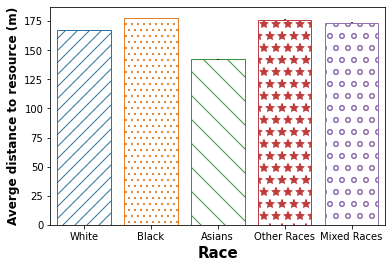

In [ ]:
run_graph('./Results/bus_mean_description.csv', "./Results/bus_biases_merged_10mil.png")

In [ ]:
ks2sample('./Results/Divvy_results_merged_2.csv')

            count        mean          std       min         25%         50%  \
P1_003N  986766.0  601.436711  1087.870844  0.044145  154.393772  237.862650   
P1_004N  801219.0  324.309758   349.276854  0.861170  174.618742  264.704140   
P1_006N  192590.0  393.760662   660.941062  0.337904  146.781598  229.697706   
P1_008N  471011.0  445.687860   683.956908  0.374984  177.588548  267.035046   
P1_009N  296540.0  516.347163   863.158505  0.415807  169.409800  259.517614   

                75%          max       N        se  
P1_003N  374.850310  7342.619931  985033  1.096104  
P1_004N  371.428128  7241.207054  800834  0.390300  
P1_006N  347.052147  7291.360431  192468  1.506550  
P1_008N  386.072022  7284.436483  470503  0.997120  
P1_009N  390.379613  7329.266719  296283  1.585759  


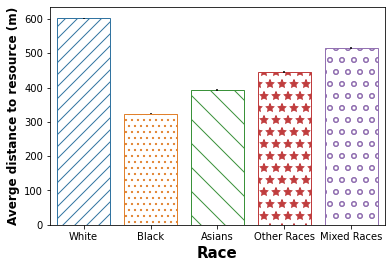

In [ ]:
run_graph('./Results/divvy_description.csv', "./Results/divvy_biases_merged_10mil.png")

In [ ]:
ks2sample('./Results/L_train_results_merged_2.csv')

             count         mean          std       min         25%  \
P1_003N  2120678.0  1440.763170  1610.350682  1.064948  452.893754   
P1_004N  1635914.0  1992.609646  1710.027112  1.488937  648.074998   
P1_006N   406370.0  1121.323049   971.223583  2.966797  454.037090   
P1_008N   955470.0  1976.004325  1668.293242  1.673793  822.180535   
P1_009N   612548.0  1841.250004  1740.020651  1.818777  647.336995   

                 50%          75%           max       N        se  
P1_003N   843.447847  1739.117063  11708.126306  985033  1.622539  
P1_004N  1420.726799  2862.483303  11625.394901  800834  1.910873  
P1_006N   811.207955  1433.351486  11043.214620  192468  2.213808  
P1_008N  1475.204282  2580.217159  11655.729451  470503  2.432155  
P1_009N  1237.549692  2458.541953  11728.183755  296283  3.196694  


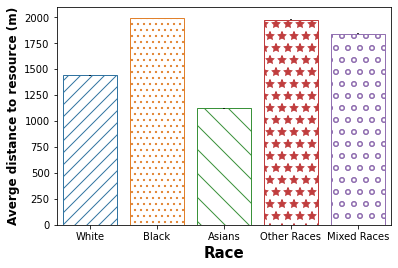

In [ ]:
run_graph('./Results/L_stops_mean_description.csv', "./Results/L_train_biases_merged_10mil.png")

In [ ]:
ks2sample('./Results/schools_results.csv')

            count        mean         std       min         25%         50%  \
P1_003N  985033.0  450.815217  256.124155  0.399964  265.166168  405.702675   
P1_004N  800834.0  374.327359  191.135701  0.168479  232.048805  351.398890   
P1_006N  192468.0  449.498953  262.767369  0.924848  258.730760  401.115828   
P1_008N  470503.0  370.043586  201.123420  1.082303  220.925993  336.118836   
P1_009N  296283.0  401.158876  223.382305  1.640136  236.811423  363.391383   

                75%          max       N        se  
P1_003N  581.025478  2325.306650  985033  0.258063  
P1_004N  491.112228  2588.581826  800834  0.213585  
P1_006N  578.833335  2119.435856  192468  0.598952  
P1_008N  486.002862  2097.972115  470503  0.293212  
P1_009N  525.368946  2283.023872  296283  0.410389  


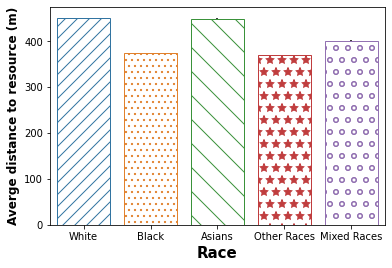

In [ ]:
run_graph('./Results/school_mean_description.csv', "./Results/schools_biases_merged_10mil.png")

In [ ]:
ks2sample('./Results/hospitals_results_2.csv')

            count         mean          std       min          25%  \
P1_003N  985033.0  1728.235479  1135.137160  0.911274   884.353563   
P1_004N  800834.0  1636.351999   938.914977  3.066752   917.782175   
P1_006N  192468.0  1642.603613   890.170236  4.949961   971.769870   
P1_008N  470503.0  2170.200964  1178.334048  5.855432  1301.358834   
P1_009N  296283.0  2040.337047  1216.432627  1.944079  1133.557119   

                 50%          75%          max       N        se  
P1_003N  1504.879922  2294.463588  6619.696387  985033  1.143729  
P1_004N  1461.385087  2216.689417  6606.049859  800834  1.049192  
P1_006N  1560.522983  2241.683187  6556.081333  192468  2.029055  
P1_008N  2020.369070  2847.660245  6617.961354  470503  1.717858  
P1_009N  1846.628668  2702.894490  6598.379706  296283  2.234780  


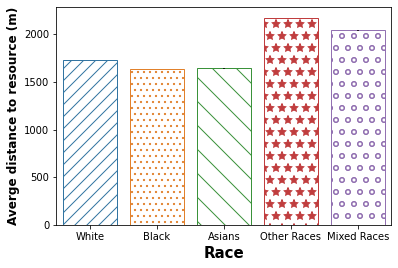

In [ ]:
run_graph('./Results/hospital_mean_description.csv', "./Results/hospitals_biases_merged_10mil.png")

In [ ]:
test_results_merge
